In [63]:


import numpy as np
import pandas as pd 


In [64]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "C:\\Users\\palay\\OneDrive\\Desktop\\corn\\.venv\\kaggle.json"

In [ ]:
import kaggle
import os

# Authenticate with Kaggle
try:
    kaggle.api.authenticate()
    print("Successfully authenticated with Kaggle!")
except Exception as e:
    print(f"Error during authentication: {e}")
    exit()

# Create the datasets folder if it doesn't exist
os.makedirs('./datasets', exist_ok=True)

# Download the dataset
try:
    kaggle.api.dataset_download_files('rahmalisaaulia/corndiseases', path='./datasets', unzip=True)
    print("Dataset downloaded and unzipped successfully!")
except Exception as e:
    print(f"Error downloading the dataset: {e}")


Error during authentication: module 'kaggle' has no attribute 'api'
Error downloading the dataset: module 'kaggle' has no attribute 'api'


: 

In [10]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [11]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('rahmalisaaulia/corndiseases', path='./datasets', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/rahmalisaaulia/corndiseases


In [7]:
pip install --upgrade kaggle


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kaggle in c:\users\palay\appdata\local\programs\python\python312\lib\site-packages (1.6.17)




[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import kaggle
print(kaggle.__file__)  # This will print the path where the `kaggle` package is installed.


c:\Users\palay\OneDrive\Desktop\corn\kaggle.py


In [1]:
!pip install kaggle


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!kaggle datasets list

In [4]:
!kaggle dataset download -d rahmalisaaulia/corndiseases

In [15]:
import PIL

In [17]:
image=PIL.Image.open('C:\\Users\\palay\\OneDrive\\Desktop\\corn\\datasets\\Plant Diseases\\test\\CornCommonRust1.JPG')

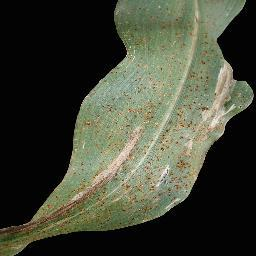

In [22]:
image

In [19]:
image_n=PIL.Image.open('C:\\Users\\palay\\OneDrive\\Desktop\\corn\\datasets\\Plant Diseases\\train\\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\\0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp 9352_90deg.JPG')

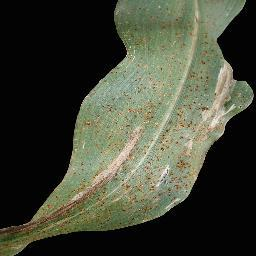

In [20]:
image

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
import tensorflow as tf

In [24]:
train_dir='C:\\Users\\palay\\OneDrive\\Desktop\\corn\\datasets\\Plant Diseases\\train'

In [49]:
train_generator=ImageDataGenerator(rescale=1/255)
data_train=train_generator.flow_from_directory(train_dir, target_size=(120, 120), batch_size=32, class_mode='categorical')

Found 7316 images belonging to 4 classes.


In [50]:
valid_dir='C:\\Users\\palay\\OneDrive\\Desktop\\corn\\datasets\\Plant Diseases\\valid'

In [51]:
valid_generator=ImageDataGenerator(rescale=1/255)
data_valid=valid_generator.flow_from_directory(valid_dir, target_size=(120, 120), batch_size=32, class_mode='categorical')

Found 1829 images belonging to 4 classes.


In [52]:
test_dir='C:\\Users\\palay\\OneDrive\\Desktop\\corn\\datasets\\Plant Diseases\\test'
test_generator=ImageDataGenerator(rescale=1/255)
data_test=test_generator.flow_from_directory(test_dir, target_size=(120, 120), batch_size=32, class_mode='categorical')

Found 0 images belonging to 0 classes.


In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(120, 120, 3)),
    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='sigmoid')
])



In [54]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │        25,604 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 414,020 (1.58 MB)

 Trainable params: 414,020 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
history=model.fit(data_train,epochs=6,validation_data=data_valid)

Epoch 1/6


c:\Users\palay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


229/229 ━━━━━━━━━━━━━━━━━━━━ 125s 529ms/step - accuracy: 0.6316 - loss: 0.3456 - val_accuracy: 0.9262 - val_loss: 0.1116
Epoch 2/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 84s 364ms/step - accuracy: 0.9354 - loss: 0.0906 - val_accuracy: 0.9049 - val_loss: 0.1251
Epoch 3/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 91s 394ms/step - accuracy: 0.9489 - loss: 0.0734 - val_accuracy: 0.9552 - val_loss: 0.0905
Epoch 4/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 82s 356ms/step - accuracy: 0.9588 - loss: 0.0605 - val_accuracy: 0.9524 - val_loss: 0.0739
Epoch 5/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 81s 351ms/step - accuracy: 0.9528 - loss: 0.0621 - val_accuracy: 0.9656 - val_loss: 0.0763
Epoch 6/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.9673 - loss: 0.0463 - val_accuracy: 0.9606 - val_loss: 0.0841


In [60]:

val_loss, val_accuracy = model.evaluate(data_valid)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.9573 - loss: 0.0990
Validation Accuracy: 96.06%


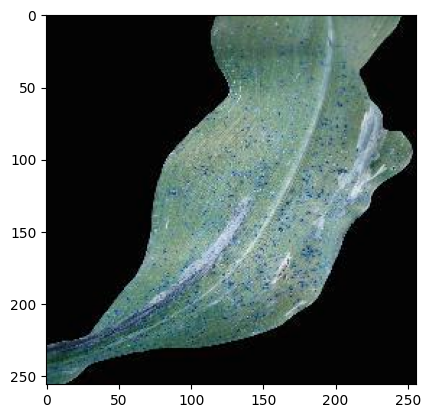

In [65]:
import cv2
test_im=cv2.imread('C:\\Users\\palay\\OneDrive\\Desktop\\corn\\datasets\\Plant Diseases\\test\\CornCommonRust1.JPG')
plt.imshow(test_im)

In [66]:
test_im.shape

(256, 256, 3)

In [67]:
test_im=cv2.resize(test_im,(120,120))

In [68]:
test_input=test_im.reshape((1,120,120,3))

In [69]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


array([[0., 0., 0., 1.]], dtype=float32)

In [71]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array



img_path = 'C:\\Users\\palay\\OneDrive\\Desktop\\corn\\datasets\\Plant Diseases\\train\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\\0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp 9352_270deg.JPG'



img = load_img(img_path, target_size=(120,120))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


img_array = img_array / 255.0


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class: {predicted_class[0]}")

if(predicted_class[0]==0):
    print("cercospora_leaf_spot_gray_leaf spot")
elif(predicted_class[0]==1):
    print("common rust")
elif(predicted_class[0]==2):
    print("Northern leaf blight")
else:
    print("healthy")


<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\palay\AppData\Local\Temp\ipykernel_35752\992144612.py:5: SyntaxWarning: invalid escape sequence '\C'
  img_path = 'C:\\Users\\palay\\OneDrive\\Desktop\\corn\\datasets\\Plant Diseases\\train\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\\0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp 9352_270deg.JPG'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Predicted class: 0
cercospora_leaf_spot_gray_leaf spot
